# Project Title: Housing Market in the U.S.

#### Project Description: An analysis of the United States Housing market aimed at identifying national trends and unique marketplace behaviors

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Load the data from the CSV file
data = pd.read_csv(r'C:\Users\jwidc\Desktop\project-1\output\data.csv', sep='\t')  # For tab-separated data
data.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,Alabama,January 2012,$127K,-6.7%,-4.5%,558,-14.8%,4.9%,"1,076",53.1%,-6.2%,"6,176",3.1%,-7.1%,148,5,-26,93.3%,0.1%,-0.3%
1,Alabama,February 2012,$153K,7.6%,5.2%,"1,235",18.8%,84.9%,"1,825",2.3%,54.5%,"9,985",2.2%,30.7%,149,5,-23,95.1%,0.2%,1.4%
2,Alabama,March 2012,$139K,2.0%,2.7%,"1,687",16.2%,116.0%,"2,476",19.4%,59.7%,"11,190",3.4%,38.7%,129,-12,-28,94.8%,0.2%,1.1%
3,Alabama,April 2012,$147K,5.6%,4.2%,"1,815",7.5%,108.1%,"2,511",1.2%,81.3%,"11,567",3.4%,43.3%,122,-7,-55,95.3%,0.5%,0.6%
4,Alabama,May 2012,$155K,11.0%,3.4%,"1,671",13.0%,95.2%,"1,995",-7.1%,46.0%,"10,131",-0.6%,25.1%,117,-8,-43,95.7%,0.8%,1.2%


### Data Cleaning Phase

In [3]:
# Check for missing values in the dataset
data.isnull().sum()

Region                         0
Month of Period End            0
Median Sale Price              0
Median Sale Price MoM          0
Median Sale Price YoY          0
Homes Sold                     0
Homes Sold MoM                 0
Homes Sold YoY                 0
New Listings                   0
New Listings MoM               0
New Listings YoY               2
Inventory                      0
Inventory MoM                  0
 Inventory YoY                 0
Days on Market                 0
Days on Market MoM             0
Days on Market YoY             0
Average Sale To List         114
Average Sale To List MoM     141
Average Sale To List YoY     151
dtype: int64

In [4]:
# Fill missing values with the median value of each column
data = data.fillna(data.median(numeric_only=True))

In [5]:

# Convert 'Month of Period End' to datetime format
data['Month of Period End'] = pd.to_datetime(data['Month of Period End'], format='%B %Y')

# Convert 'Homes Sold' and other numeric columns to numeric, coercing errors to NaN
data['Homes Sold'] = pd.to_numeric(data['Homes Sold'].replace('[,]', '', regex=True), errors='coerce')
data['New Listings'] = pd.to_numeric(data['New Listings'].replace('[,]', '', regex=True), errors='coerce')
data['Inventory'] = pd.to_numeric(data['Inventory'].replace('[,]', '', regex=True), errors='coerce')
data['Days on Market'] = pd.to_numeric(data['Days on Market'].replace('[,]', '', regex=True), errors='coerce')

# Fill any NaN values in numeric columns with the median value of the respective columns
data['Homes Sold'] = data['Homes Sold'].fillna(data['Homes Sold'].median())
data['New Listings'] = data['New Listings'].fillna(data['New Listings'].median())
data['Inventory'] = data['Inventory'].fillna(data['Inventory'].median())
data['Days on Market'] = data['Days on Market'].fillna(data['Days on Market'].median())

# Remove currency symbols and convert 'Median Sale Price' to numeric
data['Median Sale Price'] = data['Median Sale Price'].replace('[\$,K]', '', regex=True).astype(float) * 1000

# Group by quarter and calculate the median sale price for each quarter
quarterly_data = data.set_index('Month of Period End').resample('QE')['Median Sale Price'].median().reset_index()

# Create a new column for the quarter labels
quarterly_data['Quarter'] = quarterly_data['Month of Period End'].dt.to_period('Q').astype(str)


<>:17: SyntaxWarning: invalid escape sequence '\$'
<>:17: SyntaxWarning: invalid escape sequence '\$'
C:\Users\jwidc\AppData\Local\Temp\ipykernel_28548\1329816069.py:17: SyntaxWarning: invalid escape sequence '\$'
  data['Median Sale Price'] = data['Median Sale Price'].replace('[\$,K]', '', regex=True).astype(float) * 1000


### Data Analysis Phase

In [6]:
# Research Question 1: Topline national summary stats for the housing market
# Sales price
national_stats = data.groupby('Month of Period End')['Median Sale Price'].describe()
national_stats

,count,mean,std,min,25%,50%,75%,max
Month of Period End,,,,,,,,
2012-01-01,49.0,165142.857143,66180.938847,80000.0,120000.0,147000.0,196000.0,353000.0
2012-02-01,49.0,167204.081633,68918.726166,78000.0,123000.0,151000.0,195000.0,395000.0
2012-03-01,49.0,173306.122449,68559.342933,87000.0,128000.0,157000.0,191000.0,395000.0
2012-04-01,49.0,181285.714286,72178.309299,93000.0,134000.0,162000.0,198000.0,440000.0
2012-05-01,49.0,186918.367347,71373.383442,101000.0,138000.0,168000.0,206000.0,435000.0
...,...,...,...,...,...,...,...,...
2024-02-01,51.0,380294.117647,135360.894518,222000.0,263000.0,361000.0,452000.0,784000.0
2024-03-01,51.0,392176.470588,143374.712677,226000.0,274000.0,369000.0,467000.0,817000.0
2024-04-01,51.0,403196.078431,147579.540534,232000.0,276500.0,378000.0,480000.0,851000.0


In [7]:
# Research Question 2: Fastest growing metro areas in terms of Sales volume and Sales prices
# Assuming 'Sales Volume' is derived from 'Homes Sold' data
metro_growth = data.groupby('Region')['Homes Sold'].agg(['sum', 'mean']).sort_values(by='sum', ascending=False)
metro_growth.head()

,sum,mean
Region,,
Florida,4843960,32293.066667
California,4555696,30371.306667
Texas,3937898,26252.653333
Illinois,1962934,13086.226667
Georgia,1749163,11661.086667


In [8]:
# Research Question 3: Markets with the most motivation to sell (Indication of migration)
# Example calculation for Days on Market and number of listings
market_motivation = data.groupby('Region').agg({'Days on Market': 'mean', 'New Listings': 'sum'}).sort_values(by='Days on Market')
market_motivation.head(12)

,Days on Market,New Listings
Region,,
Columbia,29.886667,136807
Washington,30.426667,1505551
Nebraska,34.213333,290907
California,35.113333,5283106
Oklahoma,38.773333,590969
Colorado,39.786667,1414628
Maryland,41.506667,1196044
Delaware,43.420000,134972
Texas,44.186667,4830106


In [9]:
# Research Question 4: Housing prices fluctuation during and following COVID-19 (2017 - 2024)
# Filter the dataset for the specified time frame and analyze price trends
covid_period = data[(data['Month of Period End'].dt.year >= 2017) & (data['Month of Period End'].dt.year <= 2024)]
price_trends = covid_period.groupby(covid_period['Month of Period End'].dt.year)['Median Sale Price'].mean()
price_trends

Month of Period End
2017    244073.529412
2018    257934.640523
2019    269544.117647
2020    294983.660131
2021    338429.738562
2022    371393.790850
2023    379991.830065
2024    396470.588235
Name: Median Sale Price, dtype: float64

In [10]:

# Research Question 5: Correlation analysis between housing price and other factors
# Calculate the correlation between housing price and selected factors
correlation_matrix = data[['Median Sale Price', 'Homes Sold', 'New Listings', 'Inventory', 'Days on Market']].corr()
correlation_matrix

,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market
Median Sale Price,1.000000,0.168034,0.157335,-0.028993,-0.442897
Homes Sold,0.168034,1.000000,0.965657,0.865179,-0.315147
New Listings,0.157335,0.965657,1.000000,0.890990,-0.283261
Inventory,-0.028993,0.865179,0.890990,1.000000,-0.081746
Days on Market,-0.442897,-0.315147,-0.283261,-0.081746,1.000000


In [11]:
# Research Question 6: What regions are experiencing the highest and lowest YoY growth in median sale prices?
# Calculate Year-over-Year (YoY) growth in median sale prices
data['Year'] = data['Month of Period End'].dt.year
yoy_growth = data.groupby(['Region', 'Year'])['Median Sale Price'].mean().pct_change().unstack()

# Define number of top and bottom regions to display (adjust as needed)
num_top_regions = 10
num_bottom_regions = 10

# Get top and bottom regions for 2024
top_regions = yoy_growth[2024].nlargest(num_top_regions)
bottom_regions = yoy_growth[2024].nsmallest(num_bottom_regions)

# Combine top and bottom regions into a single DataFrame (optional for customization)
combined_regions = pd.concat([top_regions, bottom_regions])

combined_df = pd.concat([top_regions, bottom_regions], axis=1)
combined_df.columns = ['Top Growth', 'Bottom Growth']
combined_df

,Top Growth,Bottom Growth
Region,,
Hawaii,0.089952,NaN
New Jersey,0.078683,NaN
New Hampshire,0.076779,NaN
Rhode Island,0.075945,NaN
Illinois,0.070274,NaN
West Virginia,0.068425,NaN
California,0.067334,NaN
Connecticut,0.063848,NaN
Wisconsin,0.063262,NaN


### Data Visualization Phase

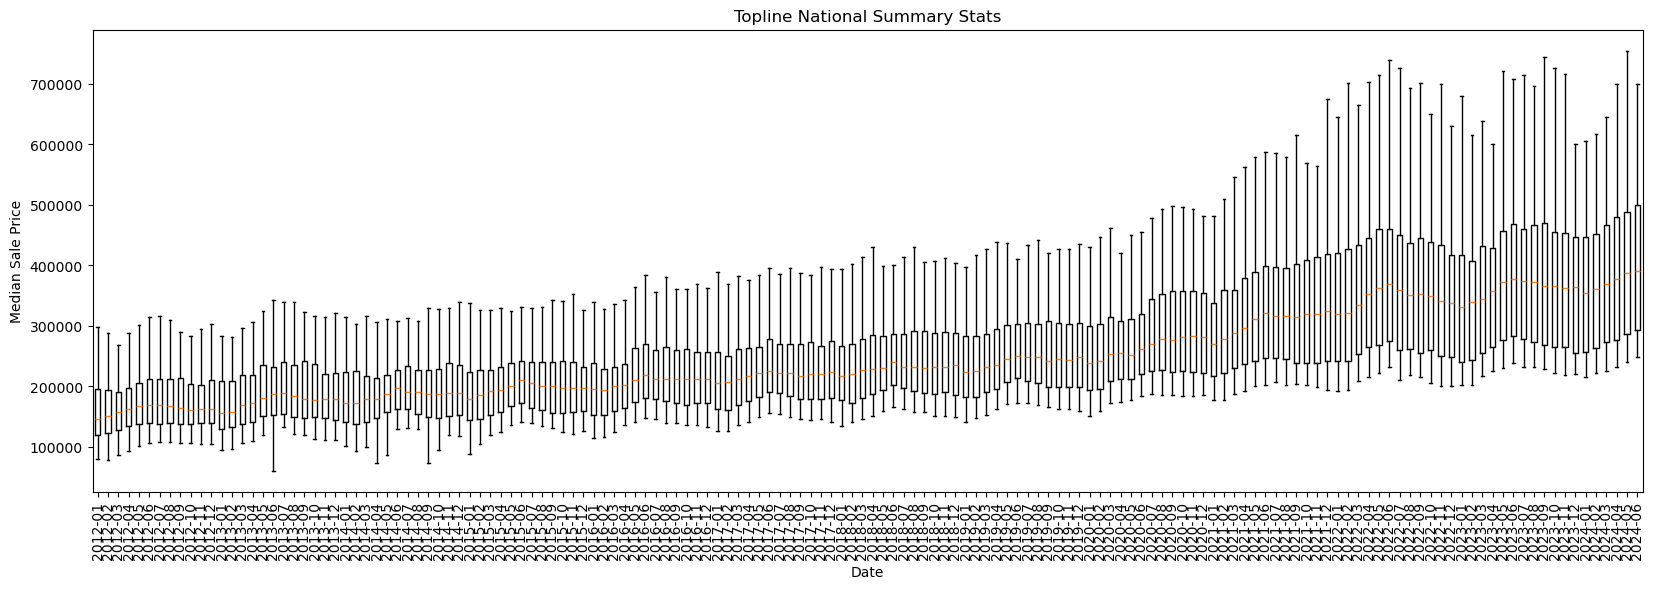

In [12]:
# Plot topline national summary stats (Monthly)
plt.figure(figsize=(20, 6))
plt.boxplot([data[data['Month of Period End'] == date]['Median Sale Price'] for date in data['Month of Period End'].unique()],
labels=data['Month of Period End'].dt.strftime('%Y-%m').unique(), showfliers=False)
plt.title('Topline National Summary Stats')
plt.xlabel('Date')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=90)
plt.show()

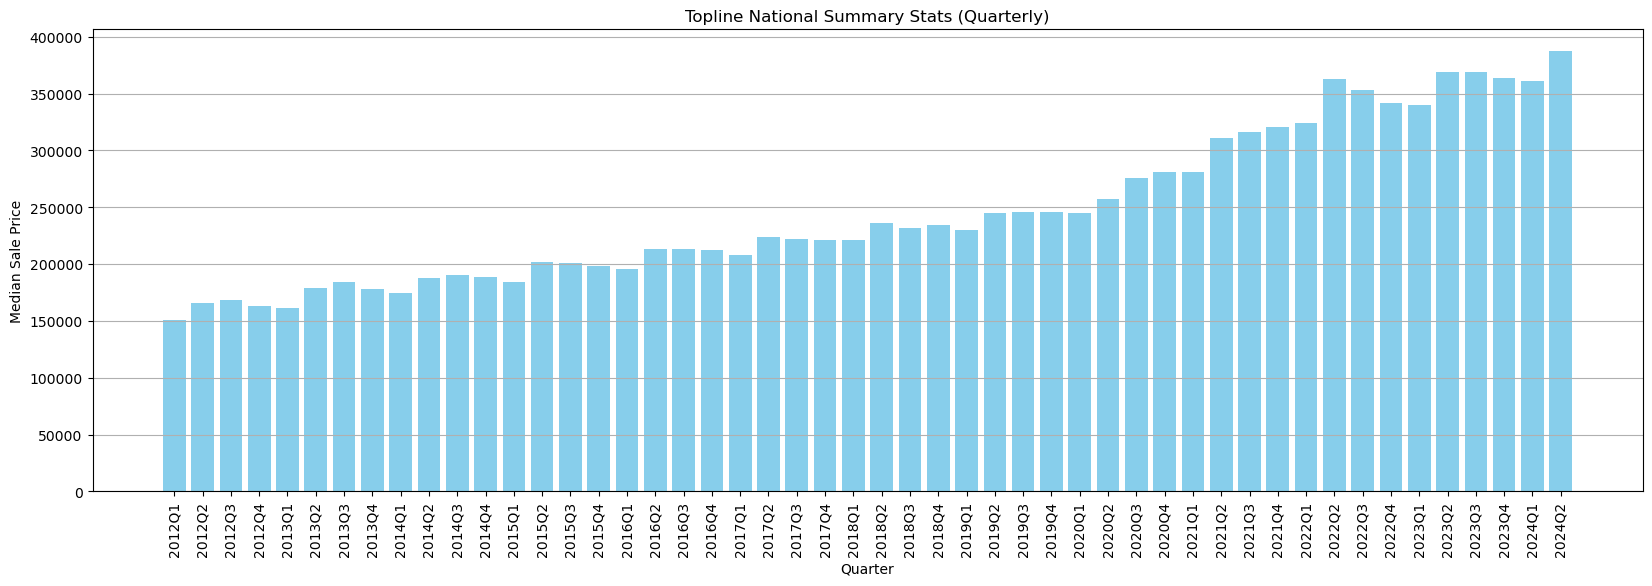

In [13]:
# Plot topline national summary stats as a bar chart (Quarterly)

plt.figure(figsize=(20, 6))
plt.bar(quarterly_data['Quarter'], quarterly_data['Median Sale Price'], color='skyblue')
plt.title('Topline National Summary Stats (Quarterly)')
plt.xlabel('Quarter')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

The consistent growth in median home sales prices in the U.S. from 2012 until today can be attributed to several interrelated factors:

1. Economic Recovery Post-2008 Financial Crisis
2. Low Interest Rates
3. Supply Constraints
4. Population Growth and Urbanization
5. Investment in Real Estate
6. COVID-19 Pandemic Effects
7. Cultural and Demographic Shifts:

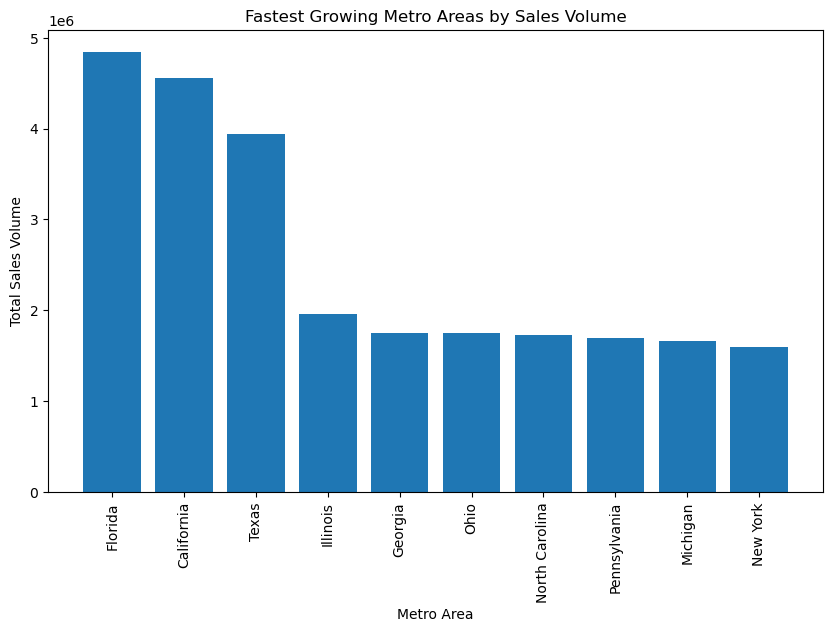

In [14]:
# Plot fastest growing metro areas in terms of Sales volume
plt.figure(figsize=(10, 6))
plt.bar(metro_growth.index[:10], metro_growth['sum'][:10])
plt.title('Fastest Growing Metro Areas by Sales Volume')
plt.xlabel('Metro Area')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=90)
plt.show()

The growth of these Metro Areas by housing sales volume can be attributed to several interrelated factors:

1. Economic Opportunities
2. Migration Trends
3. Population Growth
4. Infrastructure and Development


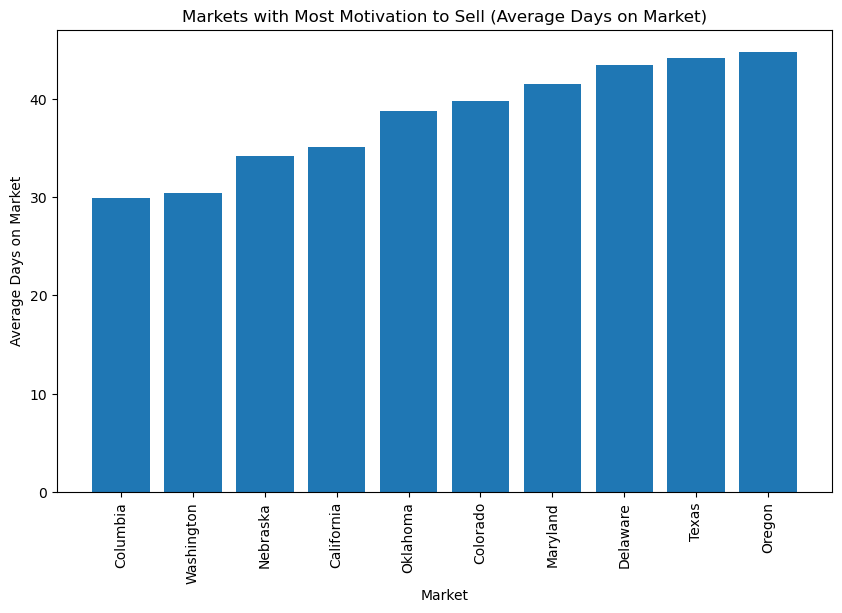

In [15]:
# Plot markets with the most motivation to sell
plt.figure(figsize=(10, 6))
plt.bar(market_motivation.index[:10], market_motivation['Days on Market'][:10])
plt.title('Markets with Most Motivation to Sell (Average Days on Market)')
plt.xlabel('Market')
plt.ylabel('Average Days on Market')
plt.xticks(rotation=90)
plt.show()

The reason for Housing sell motivation based on AVG Day on the Market can be attributed to several interrelated factors:

1. High Migration Inboud / Outbound
2. Market Saturation / Condition
3. Economic Pressures / Development
4. Aging Population / Family Changes

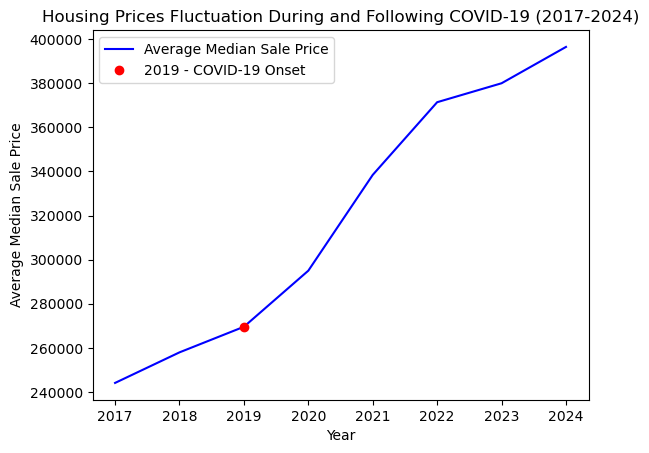

In [16]:
# Plot housing prices fluctuation during and following COVID-19

# Plot the price trends
plt.plot(price_trends.index, price_trends.values, label='Average Median Sale Price', color='blue')

# Highlight the year 2019 with a red dot
plt.plot(2019, price_trends.loc[2019], 'ro', label='2019 - COVID-19 Onset')

# Add titles and labels
plt.title('Housing Prices Fluctuation During and Following COVID-19 (2017-2024)')
plt.xlabel('Year')
plt.ylabel('Average Median Sale Price')
plt.legend()

# Show the plot
plt.show()

COVID-19 Pandemic Growth in price Effects:

1. Remote Work and Housing Preferences: The pandemic accelerated trends like remote work, leading many people to seek larger homes or move to less densely populated areas driving up prices in rural areas.
2. Supply Chain Disruptions: The pandemic caused disruptions in global supply chains, leading to shortages in construction materials and delays in building new homes. This exacerbated the existing supply constraints, further driving up prices.
3. Government Stimulus and Economic Relief: Government stimulus programs and economic relief efforts during the pandemic helped maintain consumer spending power, including the ability to purchase homes. This, coupled with low interest rates, supported continued growth in home prices.



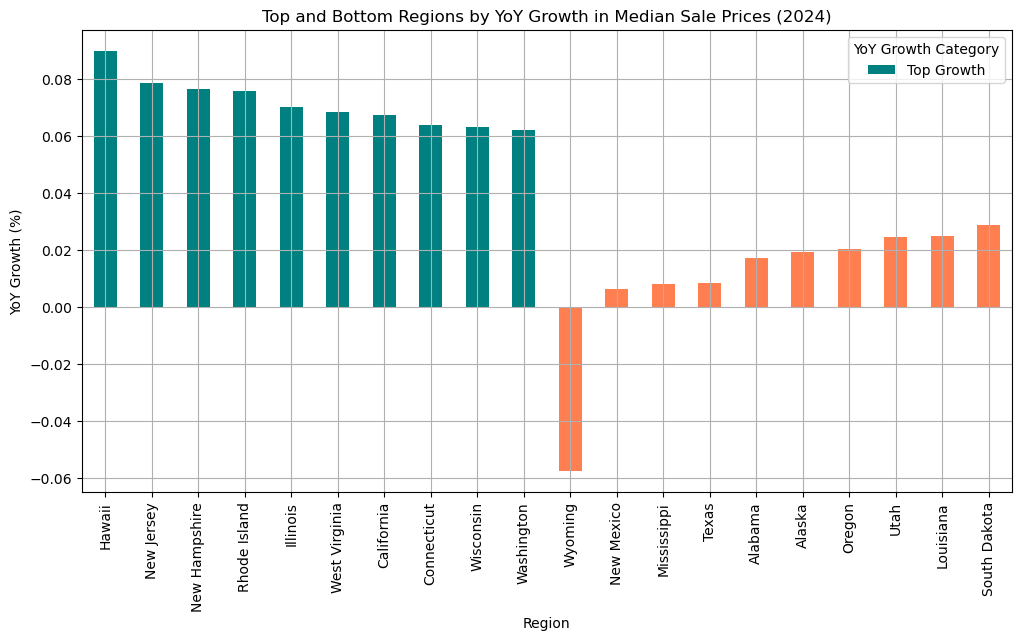

In [17]:
# Create a color list for visual distinction
colors = ['teal'] * num_top_regions + ['coral'] * num_bottom_regions

# Create the combined bar chart
plt.figure(figsize=(12, 6))
combined_regions.plot(kind='bar', color=colors)

# Customize the chart title and labels 
plt.title('Top and Bottom Regions by YoY Growth in Median Sale Prices (2024)')
plt.xlabel('Region')
plt.ylabel('YoY Growth (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title='YoY Growth Category', labels=['Top Growth', 'Least Growth']) 
plt.show()

The variations in YoY growth in median sale prices across different regions are a result of a complex interplay of economic, demographic, and market factors. Top regions by YoY growth typically benefit from strong economic performance, high demand, favorable policies, and limited supply. In contrast, bottom regions may suffer from economic challenges, population declines, oversupply, and less favorable market conditions. Understanding these factors can help explain the disparities in housing price growth across different parts of the country.
###### Wyoming has generally ranked among the slowest-growing states in the U.S. since 2012. This is primarily due to its heavy reliance on the energy sector, which has experienced significant fluctuations during this period.

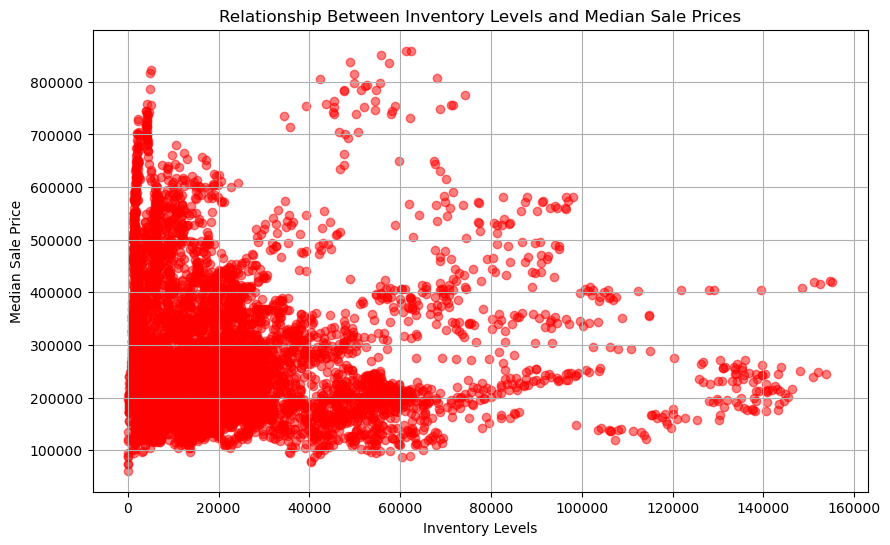

Correlation between Inventory and Median Sale Price: -0.03


In [18]:
# Scatter plot to analyze the relationship between inventory levels and median sale prices
plt.figure(figsize=(10, 6))
plt.scatter(data['Inventory'], data['Median Sale Price'], alpha=0.5, color='r')
plt.title('Relationship Between Inventory Levels and Median Sale Prices')
plt.xlabel('Inventory Levels')
plt.ylabel('Median Sale Price')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = data['Inventory'].corr(data['Median Sale Price'])
print(f"Correlation between Inventory and Median Sale Price: {correlation:.2f}")

The correlation coefficient between inventory levels and median sale prices is -0.03. This indicates that there is a very weak negative correlation between the two variables.

<Figure size 1000x600 with 0 Axes>

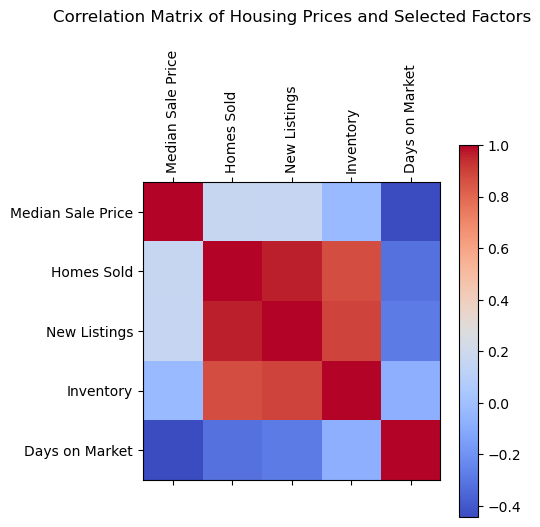

In [19]:
# Plot correlation matrix
plt.figure(figsize=(10, 6))
cax = plt.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(cax)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix of Housing Prices and Selected Factors', pad=20)
plt.show()

Interpreting the Correlations:

1. Median Sale Price and Homes Sold: There's a strong positive correlation, suggesting that as more homes are sold, the median sale price tends to increase.
2. Median Sale Price and New Listings: A moderate positive correlation exists, indicating that an increase in new listings might positively impact median sale price, but the relationship is weaker than with homes sold.
3. Median Sale Price and Inventory: A very weak negative correlation suggests almost no relationship between inventory levels and median sale price. This means that changes in inventory don't significantly affect the median sale price.
4. Median Sale Price and Days on Market: A negative correlation indicates that as days on market increase (homes take longer to sell), the median sale price tends to decrease.


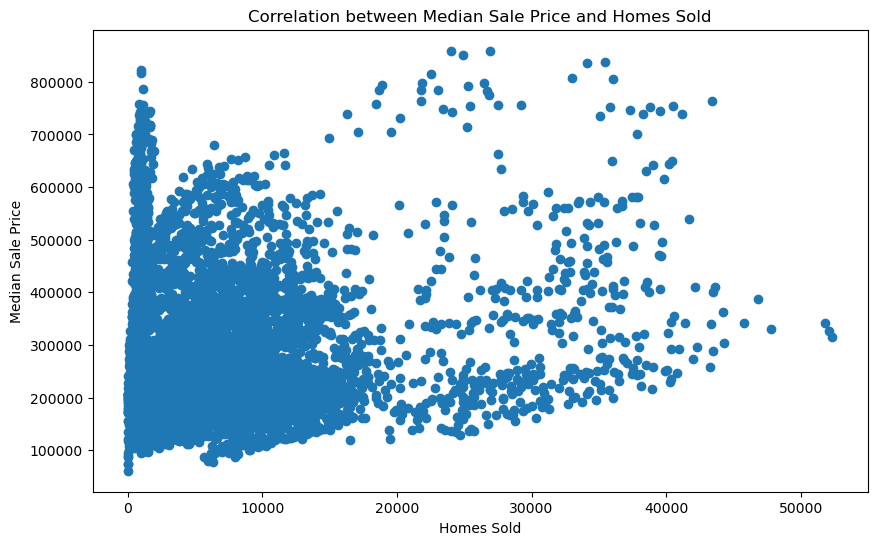

Correlation between Median Sale Price and Homes Sold: 0.17


In [20]:
# Plot correlation between Median Sale Price and Homes Sold
plt.figure(figsize=(10, 6))
plt.scatter(data['Homes Sold'], data['Median Sale Price'])
plt.title('Correlation between Median Sale Price and Homes Sold')
plt.xlabel('Homes Sold')
plt.ylabel('Median Sale Price')
plt.show()

# Calculate and print the correlation
correlation = data['Homes Sold'].corr(data['Median Sale Price'])
print(f"Correlation between Median Sale Price and Homes Sold: {correlation:.2f}")

The correlation coefficient of 0.17 between Median Sale Price and Homes Sold indicates a very weak positive relationship. This means that as the number of homes sold increases, there is a slight tendency for the median sale price to increase as well, but this relationship is not strong.

In [21]:
# Calculate and display Pearson correlation coefficient
pearson_corr, _ = stats.pearsonr(data['Median Sale Price'], data['Homes Sold'])
print(f'Pearson correlation coefficient between Median Sale Price and Homes Sold: {pearson_corr}')

Pearson correlation coefficient between Median Sale Price and Homes Sold: 0.16803449188653427


This value indicates a weak positive correlation between the two variables.